<center><H1>Modelo neuronal para estimación de generación de energía fotovoltáica con</H1><center>

<center><img src="https://www.gstatic.com/devrel-devsite/prod/ve2848ad92313fddfcd40baeb58a2f663fe2fd55c371a714a6bb3e329e2b15223/tensorflow/images/lockup.svg"  height="50px" style="padding-bottom:5px;"  /></center>

<center><H2>Julio Waissman Vilanova</H2>

<table align="center">
      <td align="center"><a target="_blank" href="https://www.unison.mx">
            <img src="https://www.unison.mx/wp-content/themes/awaken/images/logo.png"  height="70px" style="padding-bottom:5px;"  /></a></td>  
      <td align="center"><a target="_blank" href="https://www.gob.mx/cenace">
            <img src="https://universidad.cenace.gob.mx/pluginfile.php/244/block_html/content/CENACE-logo-completo.png" width="300" style="padding-bottom:5px;" /></a></td>
      <td align="center"><a target="_blank" href="https://colab.research.google.com/github/juliowaissman/rn-cenace/blob/main/Modelo_1_taller_solar.ipynb">
            <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Ejecuta en Google Colab</a></td>

</table>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use('ggplot')

## Cargando los datos

Vamos a cargar los datos que nos proporcionó la Gerencia Regional Noroeste sobre una planta de generación de energía fotovoltáica y vamos a ver si somos capaces de predecir la Generación de energía utilizando la información de la Radiación, así como la información de la fecha.

In [ ]:
url = "https://github.com/juliowaissman/curso-ml-cenace/raw/main/datos/Dataset_GeneracionFV.xlsx"
df = pd.read_excel(url, sheet_name=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              5520 non-null   datetime64[ns]
 1   Generacion_FV_MW   5520 non-null   float64       
 2   Radiacion_FV_W/m2  5520 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 129.5 KB


In [ ]:
df.index = df.Fecha
df['Hora'] = df.index.hour
df['Dia'] = df.index.day
df['Mes'] = df.index.month
df.rename(columns={'Radiacion_FV_W/m2': 'Radiacion_FV'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5520 entries, 2021-01-01 01:00:00 to 2021-08-19 00:00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             5520 non-null   datetime64[ns]
 1   Generacion_FV_MW  5520 non-null   float64       
 2   Radiacion_FV      5520 non-null   float64       
 3   Hora              5520 non-null   int64         
 4   Dia               5520 non-null   int64         
 5   Mes               5520 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 301.9 KB


## Hagamos un pequeño análisis exploratorio de datos

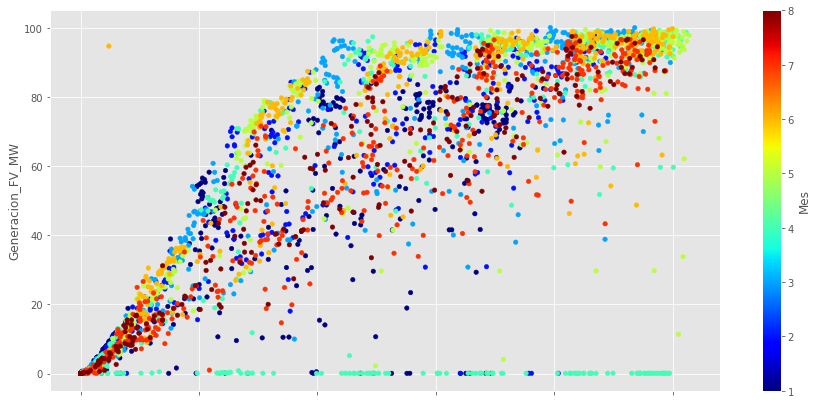

In [ ]:
df.plot.scatter(
    y='Generacion_FV_MW',
    x='Radiacion_FV',
    #s='Dia',
    c='Mes',
    colormap='jet',
    figsize=(15,7)
)

Al parecer hay varios valores aberrantes que deberíamos limpiar para hacer una predicción, por el momento vamos a dejarlos y regresaremos con la limpieza en un segundo término

In [ ]:
df.query('Radiacion_FV > 20 and Generacion_FV_MW < .5').Mes.value_counts()

4    108
1     14
2     12
7      2
Name: Mes, dtype: int64

## Predicción de la generación usando redes neuronales

Para este problema vamos a ir desarrollando el problema paso a paso.

Para esto vamos a hacer algunas hipótesis:

- El problema es estático: la generación de energía va a depender sólo de la radiación en el mismo momento, la hora del día, el día del mes y el mes del año.

- Los datos como hora, día y mes los vamos a codificar directamente, y luego veremos como funciona con one-hot encoding

- Vamos a probar primero si sólo con la radiación es posible generalizar algo decente.


### Paso 1: Seleccionar los datos y separar en conjunto de datos de entrenamiento y conjunto de datos de prueba

In [ ]:
#x = df.Radiacion_FV.to_numpy().reshape(-1,1)
x = df[['Radiacion_FV', 'Hora', 'Mes']].to_numpy()
y = df.Generacion_FV_MW.to_numpy()

#TODO: Al terminar de hacer el modelo 
#    con solo una entrada y una salida, probar 
#    agregar otras variables y documentar

print(f"La forma de x: {x.shape} y la de y = {y.shape}")

#TODO: Separa en un conjunto de prueba y otro de test
#      de manera que se escojan en forma aleatoria 
#      5000 datos en el conjunto de aprendizaje

# --- Agrega aqui tu código ---

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=5000)


La forma de x: (5520, 3) y la de y = (5520,)


In [ ]:
x_train.shape

(5000, 3)

### Paso 2: definir una red neuronal 

Recuerda que solo tenemos 5000 datos de entrenamiento (de ser posible, el número de datos de entrenamiento debería ser al menos 10 veces mayor que el número de parámetros del modelo)

In [ ]:
def modelo_sin_compil(nombre="Solar_1"):
    modelo = keras.models.Sequential(name=nombre)

    #TODO: ajusta un modelo
    # Completa donde dice None y agrega las capas que consideres
    modelo.add(layers.Dense(30, activation='sigmoid', input_shape=(x.shape[1],), name="capa_1"))
    modelo.add(layers.Dense(10, activation='sigmoid', name="capa_2"))
    modelo.add(layers.Dense(1, activation='linear', name="capa_salida"))
    #-- Agrega mas capas si tu consideres necesario
    return modelo

modelo = modelo_sin_compil()

modelo.summary()

Model: "Solar_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_1 (Dense)               (None, 30)                120       
_________________________________________________________________
capa_2 (Dense)               (None, 10)                310       
_________________________________________________________________
capa_salida (Dense)          (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


### Paso 3 Compila el modelo

Selecciona los parámetros que creas más convenientes

In [ ]:
def bias_gcr(y_true, y_pred):
    gcr = 100
    difference = tf.subtract(y_true, y_pred) 
    return tf.multiply(tf.constant(100/gcr), tf.reduce_mean(difference, axis=-1))

def modelo_compilado():
    #TODO: Selecciona optimizador, función de pérdida y métricas
    #      Completa donde dice None
    mdl = modelo_sin_compil()
    mdl.compile(
        optimizer= keras.optimizers.Adam(),
        loss=keras.losses.MeanAbsoluteError(),
        metrics=[
          keras.metrics.MeanSquaredError(),
          bias_gcr
        ],
    )
    return mdl

modelo = modelo_compilado()

### Paso 4 Entrena el modelo

Vamos a repetir este paso mientras parezca que no hay sobreaprendizaje (vamos a hacer el early stoping a mano en este caso)

In [ ]:

#TODO: Selecciona el numero de epochs (pocos cada vez)
num_epochs = 40

print(f"Entrenamiento del modelo en {num_epochs} epochs")

history = modelo.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_split=0.2 # Selecciona el porcentaje de datos para usar como validación
)

Entrenamiento del modelo en 40 epochs
Epoch 1/40
63/63 [==============================] - 0s 2ms/step - loss: 5.7602 - mean_squared_error: 239.7716 - bias_gcr: -2.9846 - val_loss: 6.1312 - val_mean_squared_error: 249.2861 - val_bias_gcr: -4.2277
Epoch 2/40
63/63 [==============================] - 0s 2ms/step - loss: 5.7346 - mean_squared_error: 237.3462 - bias_gcr: -2.8888 - val_loss: 6.0530 - val_mean_squared_error: 231.6751 - val_bias_gcr: -2.8306
Epoch 3/40
63/63 [==============================] - 0s 2ms/step - loss: 5.7284 - mean_squared_error: 240.1542 - bias_gcr: -3.0423 - val_loss: 5.9087 - val_mean_squared_error: 231.7933 - val_bias_gcr: -3.2353
Epoch 4/40
63/63 [==============================] - 0s 2ms/step - loss: 5.6809 - mean_squared_error: 238.4403 - bias_gcr: -2.9120 - val_loss: 6.0386 - val_mean_squared_error: 243.9517 - val_bias_gcr: -4.1621
Epoch 5/40
63/63 [==============================] - 0s 2ms/step - loss: 5.7880 - mean_squared_error: 242.8947 - bias_gcr: -3.1398 

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,bias_gcr,val_loss,val_mean_squared_error,val_bias_gcr
0,5.760180,239.771606,-2.984570,6.131198,249.286118,-4.227742
1,5.734643,237.346161,-2.888843,6.052989,231.675110,-2.830570
2,5.728405,240.154205,-3.042302,5.908728,231.793304,-3.235288
3,5.680865,238.440277,-2.912040,6.038590,243.951706,-4.162150
4,5.787959,242.894699,-3.139838,5.976061,226.701248,-2.553539
5,5.706981,238.424622,-3.031857,6.048660,246.617676,-4.186842
6,5.830600,242.559357,-3.090973,6.015102,226.538437,-2.277374
7,5.743565,239.545197,-3.034840,6.086286,251.379990,-4.415373
8,5.753701,238.420334,-3.024368,5.940807,234.047394,-3.294616
9,5.709498,239.140411,-3.086831,5.948373,228.733978,-2.711127


En función de como vez que evoluciona la pérdida y las métricas en los datos de validación y entrenamiento, puedes ejecutar de nuevo las dos celdas anteriores. Cada vez que las vuelvas a ejecutar, se realizan otros epochs más en el entrenamiento. Ten cuidado para evitar el sobreaprendizaje.

Si quieres reinicializar el modelo, ejecuta

```python
modelo = modelo_compilado()
```

### Paso 5 Evalúa con los datos de prueba

Este paso se ejecuta sólamente si el valor de pérdida y de las métricas se consideran aceptables. Si no es necesario buscar nuevos modelos.

In [ ]:
print("Evaluando en los datos de prueba")

results = modelo.evaluate(x_test, y_test, batch_size=128)

print("\n\nPérdida en test, Métricas en test:", results)

Evaluando en los datos de prueba
5/5 [==============================] - 0s 2ms/step - loss: 5.5948 - mean_squared_error: 215.2450 - bias_gcr: -2.6669


Pérdida en test, Métricas en test: [5.594781875610352, 215.24496459960938, -2.6668972969055176]


### Paso 6 Simula para todos los datos

Vamos a predecir para todos los datos y ver como se comporta el modelo respecto a los datos que tenemos:

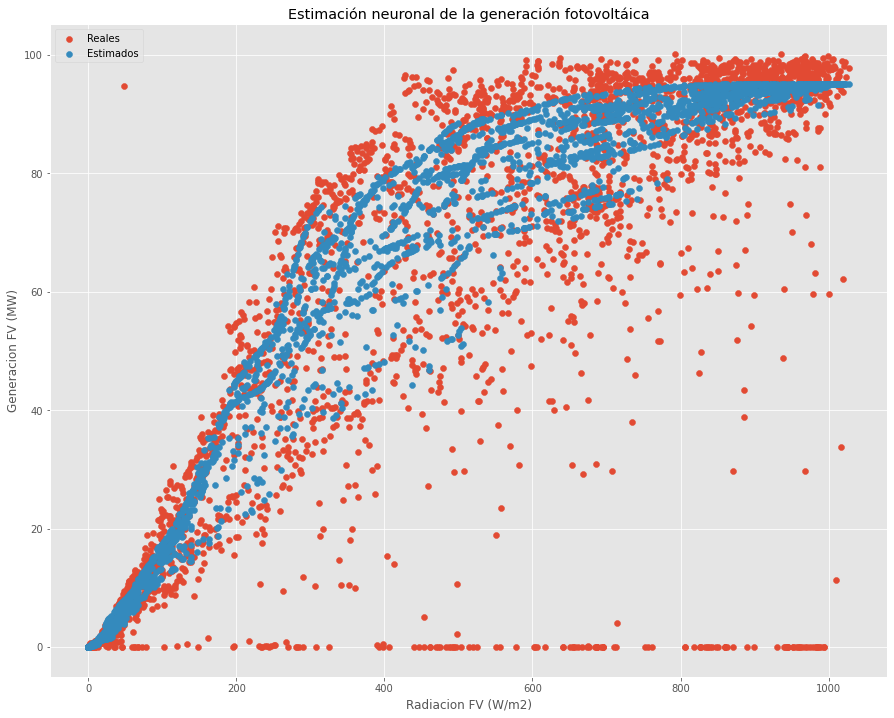

In [ ]:
y_est = modelo.predict(x)

plt.figure(figsize=(15, 12))
plt.scatter(x[:,0], y, label="Reales")
plt.scatter(x[:,0], y_est, label="Estimados")
plt.title("Estimación neuronal de la generación fotovoltáica")
plt.xlabel('Radiacion FV (W/m2)')
plt.ylabel('Generacion FV (MW)')
plt.legend()
plt.show()

### Paso 7 Revisa y critica el modelo

Si el modelo te gustó y crees que vale la pena mantenerlo, entonces guardalo en disco, y agrega un archivo texto con la explicacion del modelo.

Realiza una funcion ```preprocesamiento_modelo1``` tal que reciba el nombre del archivo y devuelva los datos en la forma que se requiere para poder estimar con tu modelo


In [ ]:
# Esto tenra que modificarse o comentarse 
# conforme se vayan desarrollando modelos más sofisticados

def preprocesamiento_modelo1(file):
    """Regresa x, y usados en el modelo1"""
    df = pd.read_excel(url, sheet_name=1)
    df.rename(columns={'Radiacion_FV_W/m2': 'Radiacion_FV'}, inplace=True)
    return df.Radiacion_FV.to_numpy(), df.Generacion_FV_MW.to_numpy()


# Guardando el modelo y su documentación

modelo.save("modelo_1")

nota = """Modelo 1
Entrada: 'Radiacion_FV_W/m2'
Salida: 'Generacion_FV_MW'

primer intento

Elaborado por J Waissman (2021)
"""  

with open('modelo_1.txt', 'w+') as fh:
    fh.write(nota)
    
    

INFO:tensorflow:Assets written to: modelo_1/assets


### Paso 8 Prueba un modelo diferente

¿Habrá un mejor modelo? ¿Uno similar con menos parámetros? ¿La selección que se realizó es la correcta en cuanto a método de optimización? ¿Sería bueno agregar regularización?

¿Que pasaria si se toma en cuenta la hora y el día? ¿Y si se consideran valores pasados?